## Reviews Processing App

### Import Libraries

In [2]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from IPython.display import display, clear_output
print("Import successful!")

Import successful!


### Import Data

In [44]:
# Columns X = [title, content] y = label (0 = negative, 1 = positive)
train_data = pd.read_csv('data/train.csv', nrows=300)
test_data = pd.read_csv('data/test.csv')

# Print the counts of 0 and 1 labels in the training data
label_counts = train_data['label'].value_counts()
print(label_counts)

# Selected columns x = review y = label
train_data = train_data[['label', 'content']].rename(columns={'content': 'review'})
test_data = test_data[['label', 'content']].rename(columns={'content': 'review'})

label
1    161
0    139
Name: count, dtype: int64


### Data Preprocessing

In [45]:
def preprocess_text(text):
    if text is None:
        print("The input text is None.")

    # Insure the text is a string    
    if not isinstance(text, str):
        text = str(text)

    # Words to exclude from stop words
    keep_words = {"not", "no", "never", "very", "always", "too", "hardly", "barely"}

    # additional_stop_words
    custom_stop_words = ["thing", "way", "many", "few", "several"]

    for word in nlp.Defaults.stop_words:
        if word not in keep_words:
            custom_stop_words.append(word)

    # ---
    doc = nlp(text)

    # ---
    preprocessed_tokens = []
    for token in doc:
        if token.text.lower() not in custom_stop_words and token.text not in string.punctuation:
            # Remove symbols using regex
            cleaned_token = re.sub(r'\W+', '', token.lemma_.lower())
            if cleaned_token:  # Ensure the token is not empty after cleaning
                preprocessed_tokens.append(cleaned_token)
    
    return " ".join(preprocessed_tokens)
                
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
# nlp = spacy.load("en_core_web_lg")

train_data['review'] = train_data['review'].apply(preprocess_text)

In [ ]:
print(train_data['review'][1])

1


### Feature Extraction

In [ ]:
# Use CountVectorizer to create the feature matrix
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(train_data['review'])

# Use TfidfVectorizer to create the feature matrix
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(train_data['review'])

# Display the shape of the feature matrices
print(f"CountVectorizer feature matrix shape: {X_count.shape}")
print(f"TfidfVectorizer feature matrix shape: {X_tfidf.shape}")

### Preprocess Data

In [ ]:
texts = train_data['review'].tolist()
labels = train_data['label'].tolist()

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Lemmatize all texts
lemmatized_texts = [lemmatize_text(text) for text in texts]

# Use CountVectorizer to create the feature matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmatized_texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the feature names
print("Feature names:", vectorizer.get_feature_names_out())

KeyboardInterrupt: 

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(train_data['review'])
X_test = vectorizer.transform(test_data['review'])

### Train Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, train_data['label'])

# Predict on test set
predictions = model.predict(X_test)
accuracy = accuracy_score(test_data['label'], predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.830185


In [ ]:
prediction = model.predict(vectorizer.transform(["I like"]))
print('positive' if prediction[0] == 1 else 'negative')

positive


In [ ]:
# Preprocess the data
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [ ]:
train_data['review'] = train_data['review'].apply(preprocess_text)
test_data['review'] = test_data['review'].apply(preprocess_text)

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['review'])
X_test = vectorizer.transform(test_data['review'])

In [ ]:
y_train = train_data['label']
y_test = test_data['label']

In [ ]:
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.886365


In [ ]:
def predict_review(review):
    review = preprocess_text(review)
    review_vector = vectorizer.transform([review])
    prediction = model.predict(review_vector)
    return 'Positive' if prediction[0] == 1 else 'Negative'

In [ ]:
# Example usage
review = "This product is not bad"
print(predict_review(review))

Negative


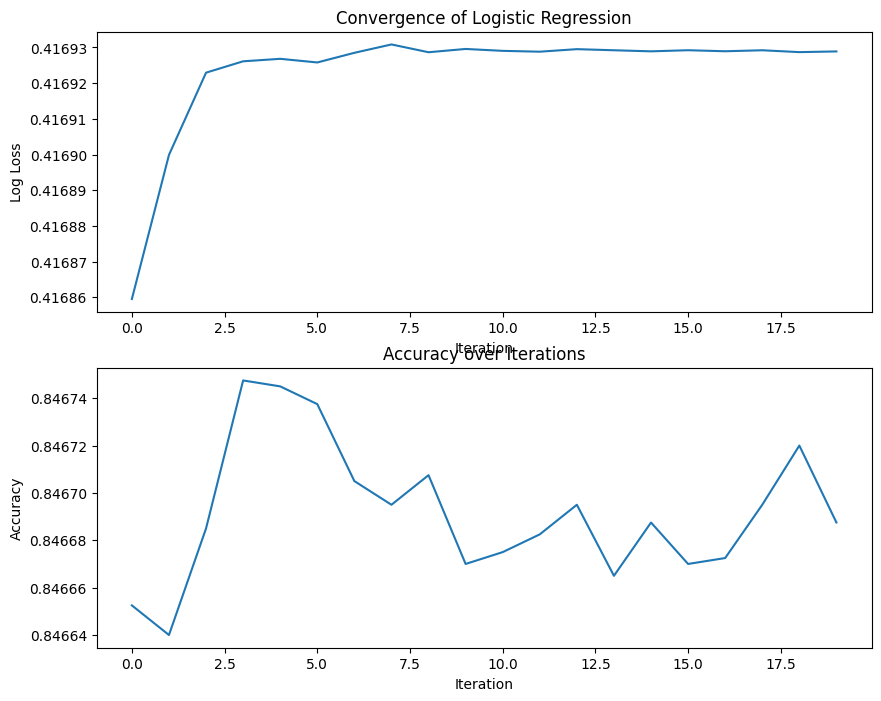

KeyboardInterrupt: 

In [ ]:
# Train the model with SGDClassifier
model = SGDClassifier(loss='log_loss', max_iter=1, tol=None, warm_start=True)
losses = []
accuracies = []

# Set up the plot
plt.ion()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
line1, = ax1.plot(losses, label='Log Loss')
line2, = ax2.plot(accuracies, label='Accuracy')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Log Loss')
ax1.set_title('Convergence of Logistic Regression')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy over Iterations')

for i in range(1000):  # Number of iterations
    model.partial_fit(X_train, y_train, classes=[0, 1])
    y_pred_proba = model.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    losses.append(loss)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Update the plot
    line1.set_ydata(losses)
    line1.set_xdata(range(len(losses)))
    line2.set_ydata(accuracies)
    line2.set_xdata(range(len(accuracies)))
    ax1.relim()
    ax1.autoscale_view()
    ax2.relim()
    ax2.autoscale_view()
    plt.draw()
    plt.pause(0.01)
    clear_output(wait=True)
    display(fig)

# Final evaluation
y_pred = model.predict(X_test)
print(f'Final Accuracy: {accuracy_score(y_test, y_pred)}')